In [176]:
#importing the libraries

#Most important data visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
#Some Metrics Measure like MSE
from sklearn.metrics import mean_squared_error
#importing the cross Val Score for cross Validation and all
from sklearn.model_selection import cross_val_score
from collections import Counter

In [178]:
#Setting the grid style
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [180]:
#Ignoring all the warnings if it comes
import warnings
warnings.filterwarnings("ignore")

In [181]:
#importing the standard os libraries
import os
os.listdir()

['Untitled.ipynb', '.ipynb_checkpoints', 'glass.csv']

In [182]:
#importing the dataset
data=pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [183]:
#Insights ABout all the attributes
#RI-Refractive Index
#Na-Sodium
#Mg-Magnesium
#Al-Aluminium
#Si-Silicon
#K-Potassium
#Ca-Calcium
#Ba-Barium
#Fe-Iron
#Type of glass we have to classify

In [184]:
#Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
#The best thing about now is everything is integer 
#It is very good to model a machine learning model

In [185]:
#Describing all the attributes and using the parameter including =all which means 
#if it is numeric data or not you want to include all
data.describe(include="all")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
#checking if there is any null value
data.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [15]:
#No null values 
#But if you get some True Value 
#so you can check how many are there

In [17]:
data.isnull().sum()
#For every column

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [18]:
#if you want total number of null values in every column
data.isnull().sum().sum()

0

In [186]:
#Scaling is different for every attribute
#After seein the attributes value
#So feature Scaling is required if you want to make a MAchine Learning Model

In [20]:
#seeing the distribution and the scatterplot

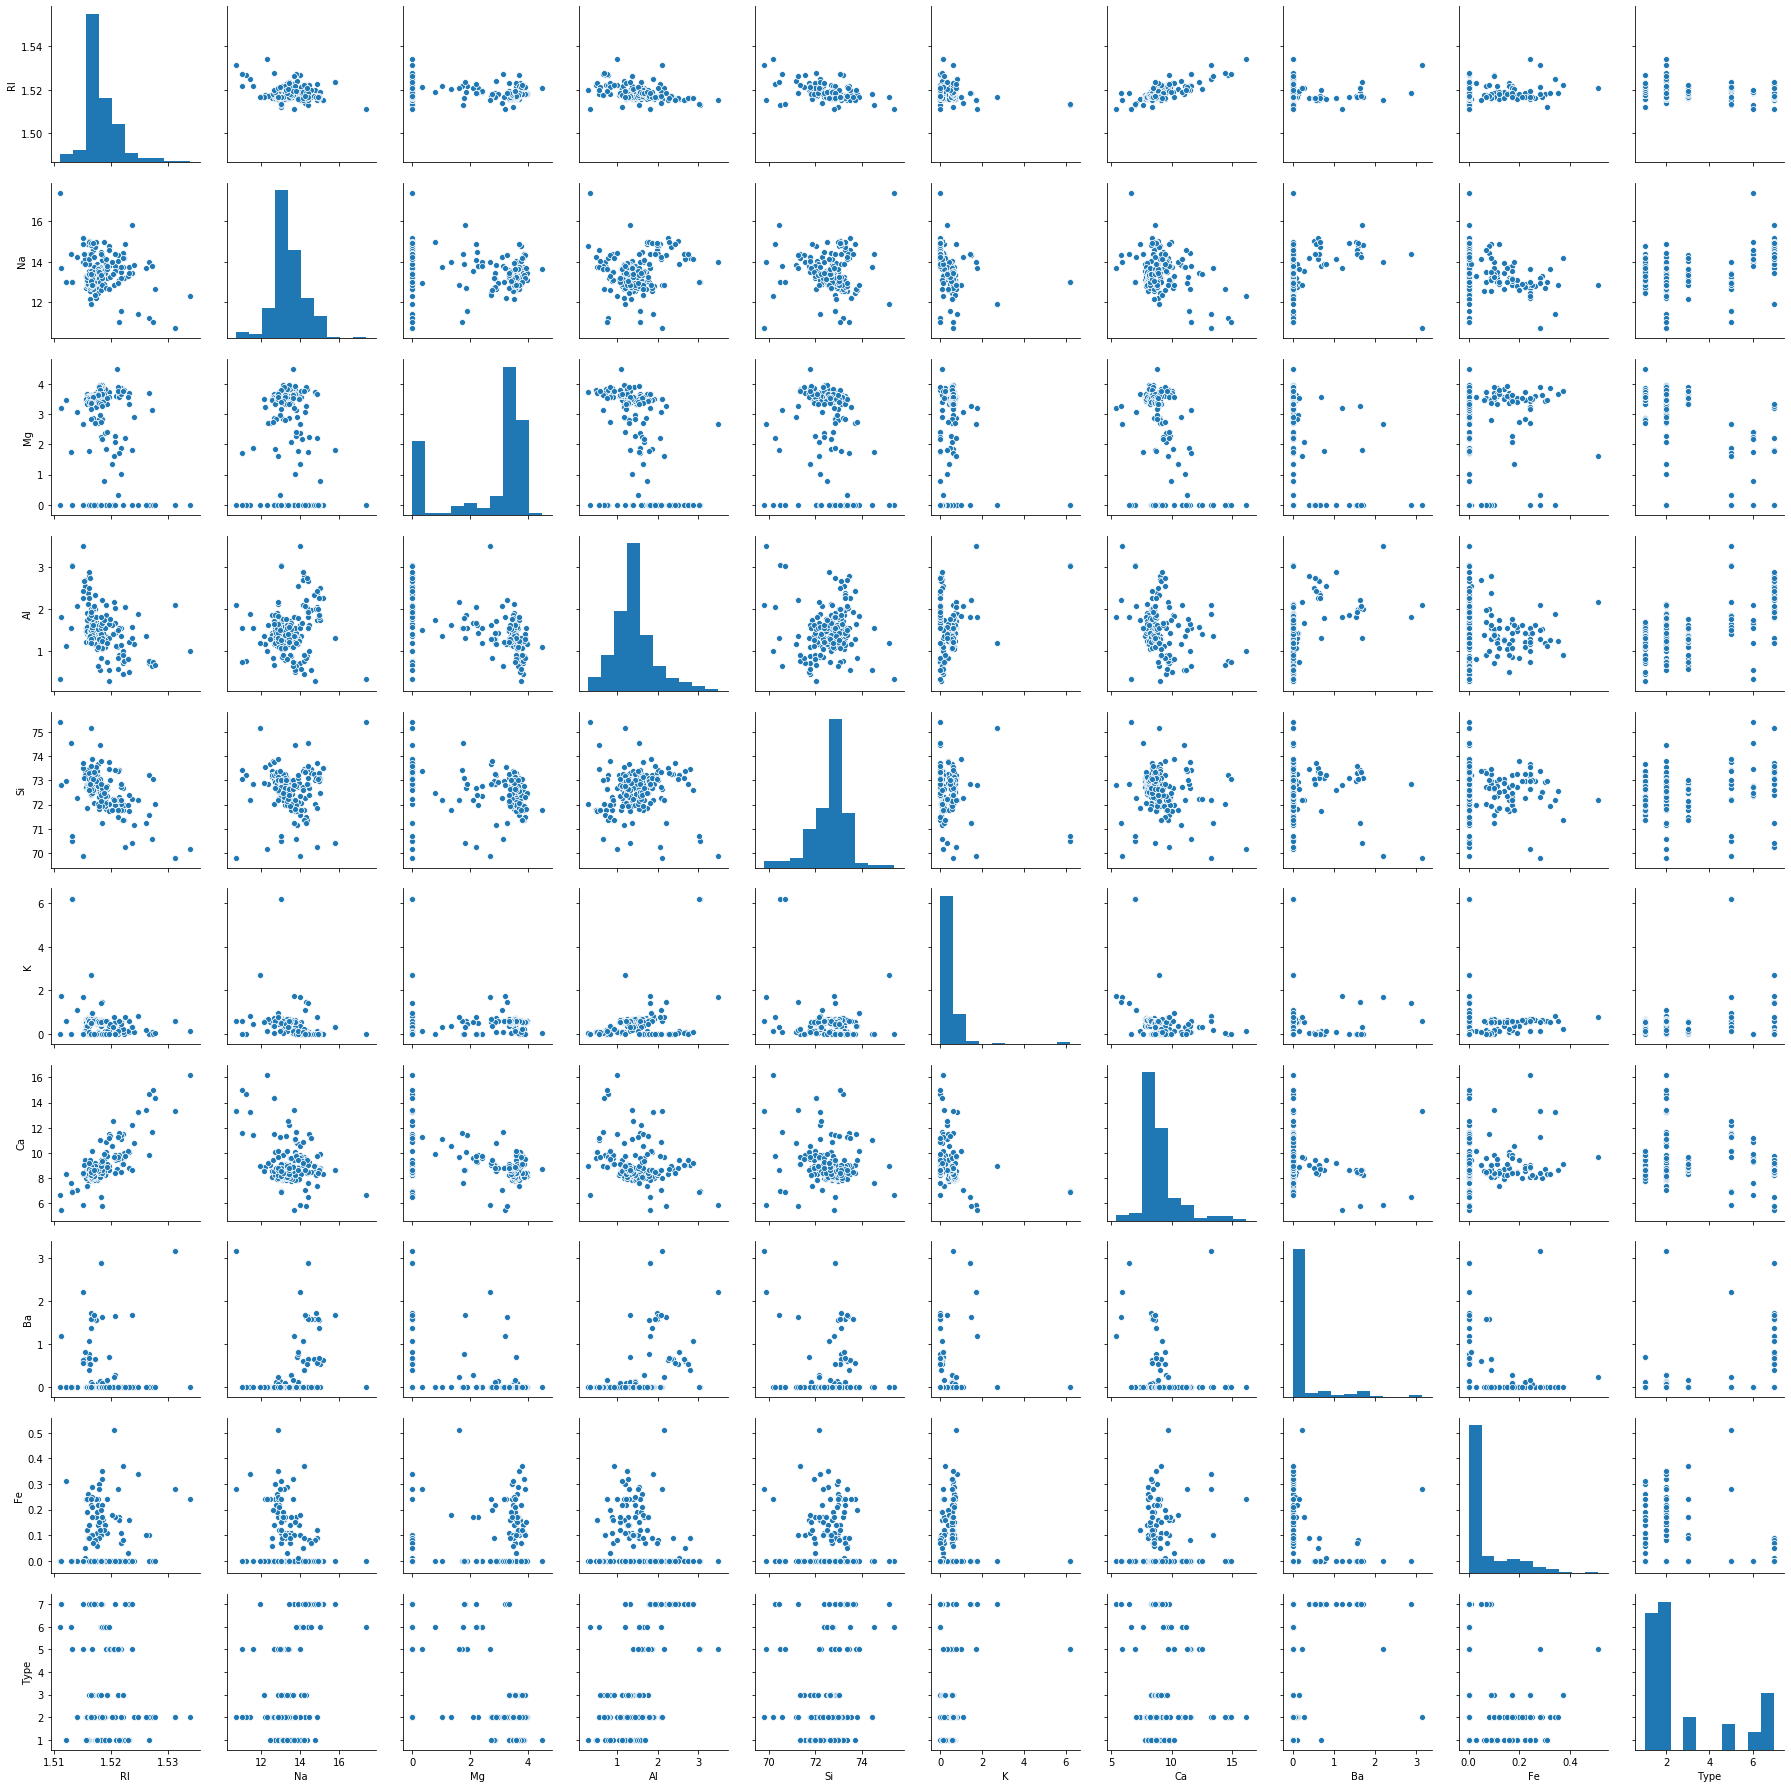

In [21]:
sns.pairplot(data)
#This is the way to see the distribution as well as the relation between the attributes

In [22]:
#But it is better to see the distribution separarely

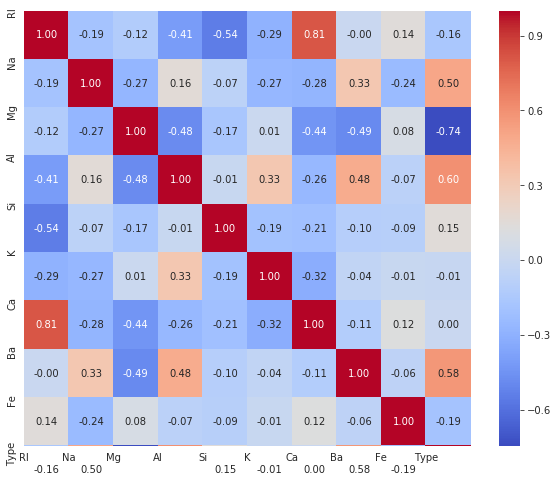

In [194]:
#Some More Data Visualization
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
#cmap is nothing but a Theme
#annot is True means you want the 
#fmt is giving you the precision of your numbers that is how many values after decimal values you want
sns.heatmap(corr, cmap='coolwarm', annot=True,fmt = ".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns)
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

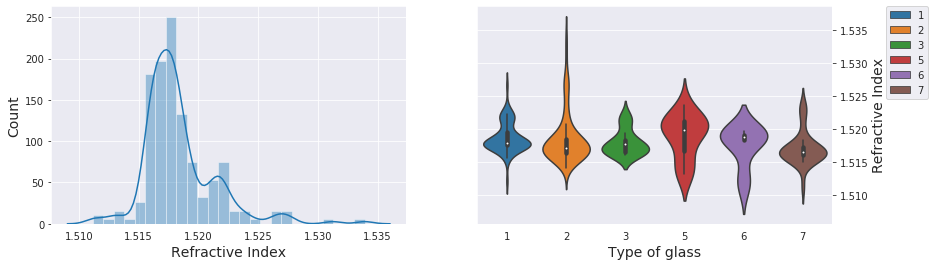

In [196]:
#Plotting the Distribution plot
#Making of the one row and two column
f, axes = plt.subplots(1,2,figsize=(14,4))

#axes[0] to access the first column
sns.distplot(data['RI'], ax = axes[0])
axes[0].set_xlabel('Refractive Index', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

#Setting the y_axis_tick to left
axes[0].yaxis.tick_left()


#Making of the violin Plot
sns.violinplot(x = 'Type', y = 'RI', data = data,hue='Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Refractive Index', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
#bbox_to_anchor and loc is used to manually place a legend
#and 2 arguemnet is placing the legend at right
plt.show()

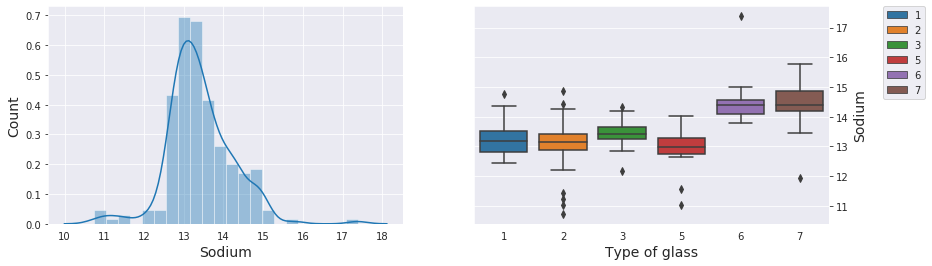

In [62]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Na'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()


sns.boxplot(x = 'Type', y = 'Na', data = data, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

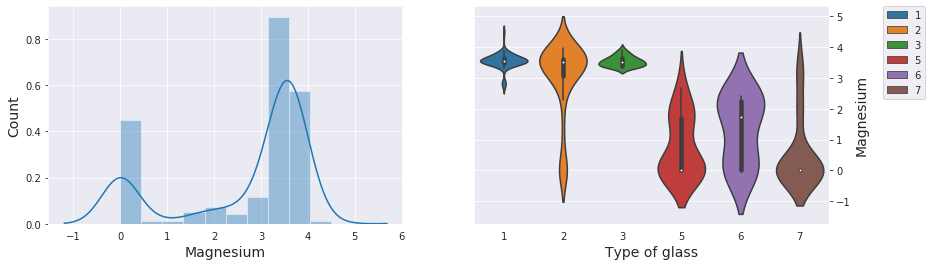

In [63]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Mg'], ax = axes[0])
axes[0].set_xlabel('Magnesium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Mg', data = data, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Magnesium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()


In [65]:
#You can do more visualization like this

In [66]:
#Splitting the data that is predictor and the predicted

In [109]:
#for machine learning model we need an array to pass
X = data.drop('Type', axis = 1).values

#you can rehape the data this way when putting in training you have to use ravel() function to again change
#or either just you iloc to directly put into the fit and other methods
#y = data['Type'].values.reshape(-1,1)
#y
y=data.iloc[:,9].values

In [110]:
#Splitting the data into train,test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [111]:
#printing the shape of the data
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160,)
Shape of y_test (54,)


In [112]:
#Importin standard Scalar function
from sklearn.preprocessing import StandardScaler


#Importing the Pipeline
from sklearn.pipeline import Pipeline

#Importing the Gridsearch method
from sklearn.model_selection import GridSearchCV

#Importing the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

#Steps of Pipelining
steps = [
    ('scalar', StandardScaler()),
    ('model', LogisticRegression())
]

#Making of the Pipeline
lr_pipe = Pipeline(steps)

In [113]:
#That is what the hyperparameters are all about that you want train
#Every Model has its own hyperparameters which define the Structure of the Model
#They donot take part in training purpose and all 
#but still they are very important 
#As it is fixed during whole trainign process
#So for the better results we have to tune them
parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state': [42] 
}

#Searching for the Paramter using GridSearch CV which checks every combination 
#This method is computationally very Expensive 
#Most of the Time RandomSearch Cv which is the Random Method surpasses this Method
classifier_lr = GridSearchCV(lr_pipe, parameters, iid=False, cv = 3)

#fitting the method
classifier_lr = classifier_lr.fit(X_train, y_train)

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [114]:
#importing the accuracy_score 
from sklearn.metrics import accuracy_score

#predicting the model on the training set
#which is irrelevant
y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)


#then simply prediting the accuracy on the test data
#which is the real challenge for us
y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.7375
Test set:  0.5925925925925926


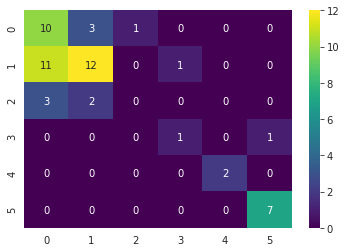

In [115]:
#Confusion matrix and using the heat map
from sklearn.metrics import confusion_matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [119]:
#Implementing the KNN
from sklearn.neighbors import KNeighborsClassifier
steps=[
    ('scalar',StandardScaler()),
    ('model' ,KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [120]:
#Hyperparameters
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}

#searching the Hyperparameters
classifier_knn = GridSearchCV(knn_pipe, parameters, iid=False, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train)

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [121]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  1.0
Test set:  0.6666666666666666


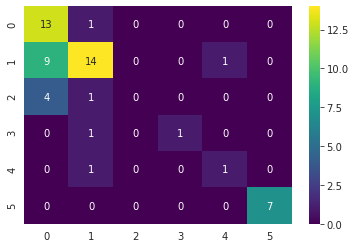

In [123]:
from sklearn.metrics import confusion_matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [124]:
#Implementing SVM(SUpport Vector Machhine)

from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_linear_pipe = Pipeline(steps)

In [125]:
#As it is the Linear Svm so we are using the linear Kernel Only
#See carefully the value of c
parameters = { 'model__kernel' : ['linear'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42]
}
classifier_svm_linear = GridSearchCV(svm_linear_pipe, parameters, iid=False, cv = 3)
classifier_svm_linear = classifier_svm_linear.fit(X_train, y_train)

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [126]:
y_pred_svm_linear_train = classifier_svm_linear.predict(X_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

Training set:  0.78125
Test set:  0.6296296296296297


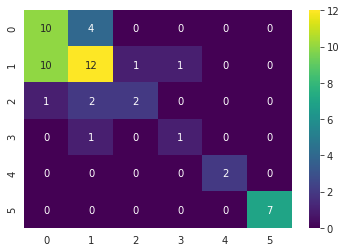

In [127]:
from sklearn.metrics import confusion_matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [128]:
# Fitting classifier to the Training set

#Implementing the Kernel SVM 
#In which we are searching the best hyperparameters
#By putting different types of Kernels
from sklearn.svm import SVC
classifier_svm_kernel = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_kernel_pipe = Pipeline(steps)

In [129]:
parameters = { 'model__kernel' : ['rbf', 'poly', 'sigmoid'],
               'model__C' : [1,10,100,1000,10000],
               'model__gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
               'model__random_state' : [42],
               'model__degree' : [1,2,3]
}
classifier_svm_kernel = GridSearchCV(svm_kernel_pipe, parameters, iid=False, cv = 3)
classifier_svm_kernel = classifier_svm_kernel.fit(X_train, y_train)

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [130]:
y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

Training set:  0.9625
Test set:  0.7037037037037037


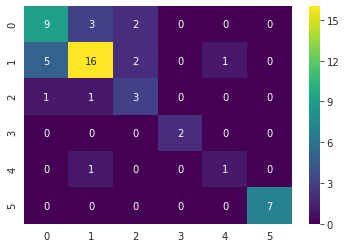

In [131]:
from sklearn.metrics import confusion_matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_svm_kernel_test), annot=True, cmap = 'viridis', fmt='.0f')
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [132]:
# Fitting classifier to the Training set
#NAive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [133]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.58125
Test set:  0.46296296296296297


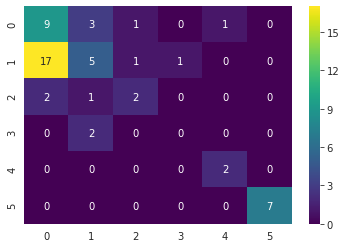

In [134]:
from sklearn.metrics import confusion_matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [197]:
# Fitting classifier to the Training set
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [137]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           cv = 3,
                           iid = False,
                           n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train)

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [138]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.975
Test set:  0.6111111111111112


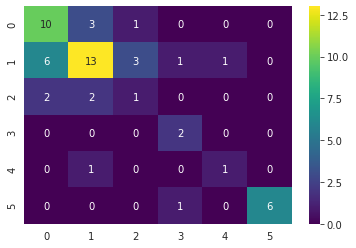

In [139]:
from sklearn.metrics import confusion_matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [141]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [142]:
parameters =  { "model__n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth": np.linspace(10, 110, num = 11),
                "model__min_samples_split": [2, 5, 10],
                "model__min_samples_leaf": [1, 2, 4],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                                  param_distributions = parameters,
                                  n_iter = 100,
                                  cv = 3,
                                  random_state=42,
                                  verbose = 4,
                                  n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


In [144]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.7222222222222222


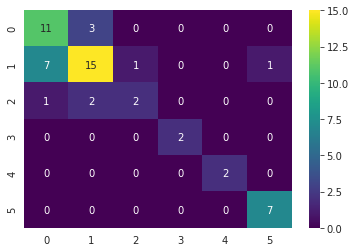

In [145]:
from sklearn.metrics import confusion_matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [161]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [151]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [152]:
# Feature Scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(160, 9)
(54, 9)


In [154]:
# Defining a function to encode output column
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

In [155]:
y_train_encoded = encode(y_train)

Shape of data (BEFORE encode): (160,)
Shape of data (AFTER  encode): (160, 8)



In [156]:
y_test_encoded = encode(y_test)

Shape of data (BEFORE encode): (54,)
Shape of data (AFTER  encode): (54, 8)



In [162]:
y_test_encoded
#as our category is only 6 types and first and 4 the col is zero 

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 

In [163]:
y_train_encoded = np.delete(y_train_encoded, [0,4], axis = 1)
y_test_encoded = np.delete(y_test_encoded, [0,4], axis = 1)
print(y_train_encoded[2])
print(y_test_encoded[2])

[1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]


In [164]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), batch_size = 100, epochs = 1150)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 160 samples, validate on 54 samples
Epoch 1/1150





160/160 [==============================] - 3s 20ms/step - loss: 1.7916 - acc: 0.2687 - val_loss: 1.7905 - val_acc: 0.2778
Epoch 2/1150
160/160 [==============================] - 0s 188us/step - loss: 1.7903 - acc: 0.3313 - val_loss: 1.7891 - val_acc: 0.2593
Epoch 3/1150
160/160 [==============================] - 0s 98us/step - loss: 1.7890 - acc: 0.3500 - val_loss: 1.7877 - val_acc: 0.2593
Epoch 4/1150
160/160 [==============================] - 0s 81us/step - loss: 1.7876 - acc: 0.3500 - val_loss: 1.7862 - val_acc: 0.2593
Epoch 5/1150
160/160 [==============================] - 0s 150us/step - loss: 1.7862 - acc: 0.3500 - val_loss: 1.7847 - val_acc: 0.2593
Epoch 6/1150
160/160 [==============================] - 0s 163us/step - loss: 1.7848 - acc: 0.3500 - val_loss: 1.7832 - val_acc: 0.2593
Epoch 7/1150
160/160 [==================

160/160 [==============================] - 0s 93us/step - loss: 1.6453 - acc: 0.4125 - val_loss: 1.6423 - val_acc: 0.3148
Epoch 47/1150
160/160 [==============================] - 0s 208us/step - loss: 1.6376 - acc: 0.4563 - val_loss: 1.6347 - val_acc: 0.3704
Epoch 48/1150
160/160 [==============================] - 0s 139us/step - loss: 1.6298 - acc: 0.4875 - val_loss: 1.6268 - val_acc: 0.4259
Epoch 49/1150
160/160 [==============================] - 0s 82us/step - loss: 1.6215 - acc: 0.5125 - val_loss: 1.6187 - val_acc: 0.4444
Epoch 50/1150
160/160 [==============================] - 0s 133us/step - loss: 1.6130 - acc: 0.5187 - val_loss: 1.6103 - val_acc: 0.4444
Epoch 51/1150
160/160 [==============================] - 0s 141us/step - loss: 1.6045 - acc: 0.5187 - val_loss: 1.6017 - val_acc: 0.4444
Epoch 52/1150
160/160 [==============================] - 0s 106us/step - loss: 1.5951 - acc: 0.5312 - val_loss: 1.5927 - val_acc: 0.4444
Epoch 53/1150
160/160 [==============================] - 

Epoch 106/1150
160/160 [==============================] - 0s 121us/step - loss: 1.1304 - acc: 0.5313 - val_loss: 1.1393 - val_acc: 0.4259
Epoch 107/1150
160/160 [==============================] - 0s 167us/step - loss: 1.1268 - acc: 0.5312 - val_loss: 1.1366 - val_acc: 0.4259
Epoch 108/1150
160/160 [==============================] - 0s 147us/step - loss: 1.1232 - acc: 0.5375 - val_loss: 1.1337 - val_acc: 0.4259
Epoch 109/1150
160/160 [==============================] - 0s 156us/step - loss: 1.1199 - acc: 0.5375 - val_loss: 1.1310 - val_acc: 0.4259
Epoch 110/1150
160/160 [==============================] - 0s 109us/step - loss: 1.1167 - acc: 0.5375 - val_loss: 1.1284 - val_acc: 0.4259
Epoch 111/1150
160/160 [==============================] - 0s 100us/step - loss: 1.1137 - acc: 0.5375 - val_loss: 1.1259 - val_acc: 0.4259
Epoch 112/1150
160/160 [==============================] - 0s 113us/step - loss: 1.1106 - acc: 0.5438 - val_loss: 1.1235 - val_acc: 0.4259
Epoch 113/1150
160/160 [==========

160/160 [==============================] - 0s 200us/step - loss: 1.0058 - acc: 0.6063 - val_loss: 1.0427 - val_acc: 0.4815
Epoch 166/1150
160/160 [==============================] - 0s 217us/step - loss: 1.0042 - acc: 0.6063 - val_loss: 1.0421 - val_acc: 0.4815
Epoch 167/1150
160/160 [==============================] - 0s 299us/step - loss: 1.0028 - acc: 0.6062 - val_loss: 1.0411 - val_acc: 0.5000
Epoch 168/1150
160/160 [==============================] - 0s 79us/step - loss: 1.0012 - acc: 0.6000 - val_loss: 1.0404 - val_acc: 0.5000
Epoch 169/1150
160/160 [==============================] - 0s 276us/step - loss: 0.9997 - acc: 0.5937 - val_loss: 1.0396 - val_acc: 0.5000
Epoch 170/1150
160/160 [==============================] - 0s 111us/step - loss: 0.9981 - acc: 0.5875 - val_loss: 1.0391 - val_acc: 0.5000
Epoch 171/1150
160/160 [==============================] - 0s 78us/step - loss: 0.9966 - acc: 0.5875 - val_loss: 1.0387 - val_acc: 0.5000
Epoch 172/1150
160/160 [===========================

160/160 [==============================] - 0s 125us/step - loss: 0.9281 - acc: 0.6500 - val_loss: 0.9981 - val_acc: 0.5370
Epoch 225/1150
160/160 [==============================] - 0s 159us/step - loss: 0.9270 - acc: 0.6500 - val_loss: 0.9979 - val_acc: 0.5370
Epoch 226/1150
160/160 [==============================] - 0s 207us/step - loss: 0.9259 - acc: 0.6500 - val_loss: 0.9975 - val_acc: 0.5370
Epoch 227/1150
160/160 [==============================] - 0s 113us/step - loss: 0.9247 - acc: 0.6500 - val_loss: 0.9968 - val_acc: 0.5370
Epoch 228/1150
160/160 [==============================] - 0s 130us/step - loss: 0.9237 - acc: 0.6500 - val_loss: 0.9963 - val_acc: 0.5370
Epoch 229/1150
160/160 [==============================] - 0s 144us/step - loss: 0.9226 - acc: 0.6563 - val_loss: 0.9953 - val_acc: 0.5370
Epoch 230/1150
160/160 [==============================] - 0s 113us/step - loss: 0.9217 - acc: 0.6563 - val_loss: 0.9949 - val_acc: 0.5370
Epoch 231/1150
160/160 [=========================

160/160 [==============================] - 0s 150us/step - loss: 0.8718 - acc: 0.6687 - val_loss: 0.9891 - val_acc: 0.5556
Epoch 284/1150
160/160 [==============================] - 0s 173us/step - loss: 0.8711 - acc: 0.6687 - val_loss: 0.9885 - val_acc: 0.5556
Epoch 285/1150
160/160 [==============================] - 0s 108us/step - loss: 0.8702 - acc: 0.6687 - val_loss: 0.9881 - val_acc: 0.5556
Epoch 286/1150
160/160 [==============================] - 0s 141us/step - loss: 0.8694 - acc: 0.6687 - val_loss: 0.9878 - val_acc: 0.5556
Epoch 287/1150
160/160 [==============================] - 0s 104us/step - loss: 0.8687 - acc: 0.6688 - val_loss: 0.9876 - val_acc: 0.5556
Epoch 288/1150
160/160 [==============================] - 0s 117us/step - loss: 0.8681 - acc: 0.6750 - val_loss: 0.9874 - val_acc: 0.5556
Epoch 289/1150
160/160 [==============================] - 0s 119us/step - loss: 0.8673 - acc: 0.6750 - val_loss: 0.9874 - val_acc: 0.5556
Epoch 290/1150
160/160 [=========================

160/160 [==============================] - 0s 122us/step - loss: 0.8346 - acc: 0.6750 - val_loss: 0.9789 - val_acc: 0.5556
Epoch 343/1150
160/160 [==============================] - 0s 169us/step - loss: 0.8340 - acc: 0.6750 - val_loss: 0.9787 - val_acc: 0.5556
Epoch 344/1150
160/160 [==============================] - 0s 125us/step - loss: 0.8334 - acc: 0.6750 - val_loss: 0.9786 - val_acc: 0.5556
Epoch 345/1150
160/160 [==============================] - 0s 192us/step - loss: 0.8329 - acc: 0.6813 - val_loss: 0.9785 - val_acc: 0.5741
Epoch 346/1150
160/160 [==============================] - 0s 216us/step - loss: 0.8323 - acc: 0.6813 - val_loss: 0.9786 - val_acc: 0.5741
Epoch 347/1150
160/160 [==============================] - 0s 232us/step - loss: 0.8318 - acc: 0.6812 - val_loss: 0.9789 - val_acc: 0.5741
Epoch 348/1150
160/160 [==============================] - 0s 281us/step - loss: 0.8312 - acc: 0.6812 - val_loss: 0.9790 - val_acc: 0.5741
Epoch 349/1150
160/160 [=========================

160/160 [==============================] - 0s 148us/step - loss: 0.8058 - acc: 0.7000 - val_loss: 0.9863 - val_acc: 0.5556
Epoch 402/1150
160/160 [==============================] - 0s 172us/step - loss: 0.8052 - acc: 0.7062 - val_loss: 0.9867 - val_acc: 0.5556
Epoch 403/1150
160/160 [==============================] - 0s 171us/step - loss: 0.8048 - acc: 0.7062 - val_loss: 0.9868 - val_acc: 0.5556
Epoch 404/1150
160/160 [==============================] - 0s 128us/step - loss: 0.8043 - acc: 0.7062 - val_loss: 0.9869 - val_acc: 0.5556
Epoch 405/1150
160/160 [==============================] - 0s 68us/step - loss: 0.8039 - acc: 0.7062 - val_loss: 0.9866 - val_acc: 0.5556
Epoch 406/1150
160/160 [==============================] - 0s 104us/step - loss: 0.8033 - acc: 0.7062 - val_loss: 0.9860 - val_acc: 0.5556
Epoch 407/1150
160/160 [==============================] - 0s 103us/step - loss: 0.8029 - acc: 0.7063 - val_loss: 0.9858 - val_acc: 0.5556
Epoch 408/1150
160/160 [==========================

160/160 [==============================] - 0s 152us/step - loss: 0.7760 - acc: 0.7188 - val_loss: 0.9831 - val_acc: 0.5556
Epoch 461/1150
160/160 [==============================] - 0s 130us/step - loss: 0.7758 - acc: 0.7188 - val_loss: 0.9829 - val_acc: 0.5556
Epoch 462/1150
160/160 [==============================] - 0s 172us/step - loss: 0.7751 - acc: 0.7188 - val_loss: 0.9835 - val_acc: 0.5556
Epoch 463/1150
160/160 [==============================] - 0s 110us/step - loss: 0.7746 - acc: 0.7187 - val_loss: 0.9843 - val_acc: 0.5556
Epoch 464/1150
160/160 [==============================] - 0s 124us/step - loss: 0.7741 - acc: 0.7187 - val_loss: 0.9849 - val_acc: 0.5556
Epoch 465/1150
160/160 [==============================] - 0s 93us/step - loss: 0.7736 - acc: 0.7188 - val_loss: 0.9856 - val_acc: 0.5556
Epoch 466/1150
160/160 [==============================] - 0s 97us/step - loss: 0.7734 - acc: 0.7188 - val_loss: 0.9864 - val_acc: 0.5556
Epoch 467/1150
160/160 [===========================

160/160 [==============================] - 0s 101us/step - loss: 0.7508 - acc: 0.7250 - val_loss: 0.9851 - val_acc: 0.5556
Epoch 520/1150
160/160 [==============================] - 0s 143us/step - loss: 0.7505 - acc: 0.7250 - val_loss: 0.9843 - val_acc: 0.5556
Epoch 521/1150
160/160 [==============================] - 0s 111us/step - loss: 0.7501 - acc: 0.7250 - val_loss: 0.9836 - val_acc: 0.5556
Epoch 522/1150
160/160 [==============================] - 0s 125us/step - loss: 0.7497 - acc: 0.7250 - val_loss: 0.9830 - val_acc: 0.5556
Epoch 523/1150
160/160 [==============================] - 0s 95us/step - loss: 0.7494 - acc: 0.7250 - val_loss: 0.9827 - val_acc: 0.5556
Epoch 524/1150
160/160 [==============================] - 0s 105us/step - loss: 0.7489 - acc: 0.7250 - val_loss: 0.9823 - val_acc: 0.5556
Epoch 525/1150
160/160 [==============================] - 0s 121us/step - loss: 0.7485 - acc: 0.7250 - val_loss: 0.9818 - val_acc: 0.5556
Epoch 526/1150
160/160 [==========================

160/160 [==============================] - 0s 171us/step - loss: 0.7292 - acc: 0.7438 - val_loss: 0.9953 - val_acc: 0.5556
Epoch 579/1150
160/160 [==============================] - 0s 131us/step - loss: 0.7289 - acc: 0.7438 - val_loss: 0.9955 - val_acc: 0.5556
Epoch 580/1150
160/160 [==============================] - 0s 130us/step - loss: 0.7287 - acc: 0.7437 - val_loss: 0.9958 - val_acc: 0.5556
Epoch 581/1150
160/160 [==============================] - 0s 111us/step - loss: 0.7282 - acc: 0.7437 - val_loss: 0.9963 - val_acc: 0.5556
Epoch 582/1150
160/160 [==============================] - 0s 125us/step - loss: 0.7281 - acc: 0.7438 - val_loss: 0.9969 - val_acc: 0.5556
Epoch 583/1150
160/160 [==============================] - 0s 142us/step - loss: 0.7277 - acc: 0.7437 - val_loss: 0.9971 - val_acc: 0.5556
Epoch 584/1150
160/160 [==============================] - 0s 164us/step - loss: 0.7273 - acc: 0.7437 - val_loss: 0.9975 - val_acc: 0.5556
Epoch 585/1150
160/160 [=========================

160/160 [==============================] - 0s 172us/step - loss: 0.7119 - acc: 0.7562 - val_loss: 1.0038 - val_acc: 0.5556
Epoch 638/1150
160/160 [==============================] - 0s 167us/step - loss: 0.7116 - acc: 0.7563 - val_loss: 1.0047 - val_acc: 0.5556
Epoch 639/1150
160/160 [==============================] - 0s 167us/step - loss: 0.7112 - acc: 0.7562 - val_loss: 1.0055 - val_acc: 0.5556
Epoch 640/1150
160/160 [==============================] - 0s 173us/step - loss: 0.7110 - acc: 0.7562 - val_loss: 1.0067 - val_acc: 0.5556
Epoch 641/1150
160/160 [==============================] - 0s 137us/step - loss: 0.7105 - acc: 0.7562 - val_loss: 1.0074 - val_acc: 0.5556
Epoch 642/1150
160/160 [==============================] - 0s 99us/step - loss: 0.7103 - acc: 0.7562 - val_loss: 1.0082 - val_acc: 0.5556
Epoch 643/1150
160/160 [==============================] - 0s 79us/step - loss: 0.7100 - acc: 0.7562 - val_loss: 1.0085 - val_acc: 0.5556
Epoch 644/1150
160/160 [===========================

160/160 [==============================] - 0s 63us/step - loss: 0.6918 - acc: 0.7687 - val_loss: 1.0189 - val_acc: 0.5556
Epoch 697/1150
160/160 [==============================] - 0s 89us/step - loss: 0.6916 - acc: 0.7688 - val_loss: 1.0189 - val_acc: 0.5556
Epoch 698/1150
160/160 [==============================] - 0s 120us/step - loss: 0.6912 - acc: 0.7687 - val_loss: 1.0192 - val_acc: 0.5556
Epoch 699/1150
160/160 [==============================] - 0s 78us/step - loss: 0.6909 - acc: 0.7688 - val_loss: 1.0195 - val_acc: 0.5556
Epoch 700/1150
160/160 [==============================] - 0s 91us/step - loss: 0.6905 - acc: 0.7688 - val_loss: 1.0207 - val_acc: 0.5556
Epoch 701/1150
160/160 [==============================] - 0s 126us/step - loss: 0.6901 - acc: 0.7688 - val_loss: 1.0217 - val_acc: 0.5556
Epoch 702/1150
160/160 [==============================] - 0s 202us/step - loss: 0.6898 - acc: 0.7688 - val_loss: 1.0228 - val_acc: 0.5556
Epoch 703/1150
160/160 [=============================

160/160 [==============================] - ETA: 0s - loss: 0.7000 - acc: 0.770 - 0s 223us/step - loss: 0.6714 - acc: 0.7750 - val_loss: 1.0325 - val_acc: 0.5741
Epoch 756/1150
160/160 [==============================] - 0s 239us/step - loss: 0.6710 - acc: 0.7750 - val_loss: 1.0333 - val_acc: 0.5741
Epoch 757/1150
160/160 [==============================] - 0s 197us/step - loss: 0.6706 - acc: 0.7750 - val_loss: 1.0339 - val_acc: 0.5741
Epoch 758/1150
160/160 [==============================] - 0s 168us/step - loss: 0.6703 - acc: 0.7750 - val_loss: 1.0344 - val_acc: 0.5741
Epoch 759/1150
160/160 [==============================] - 0s 209us/step - loss: 0.6699 - acc: 0.7750 - val_loss: 1.0351 - val_acc: 0.5741
Epoch 760/1150
160/160 [==============================] - ETA: 0s - loss: 0.7580 - acc: 0.740 - 0s 207us/step - loss: 0.6695 - acc: 0.7750 - val_loss: 1.0359 - val_acc: 0.5741
Epoch 761/1150
160/160 [==============================] - 0s 203us/step - loss: 0.6691 - acc: 0.7750 - val_loss

Epoch 814/1150
160/160 [==============================] - 0s 149us/step - loss: 0.6473 - acc: 0.7750 - val_loss: 1.0523 - val_acc: 0.5741
Epoch 815/1150
160/160 [==============================] - 0s 171us/step - loss: 0.6468 - acc: 0.7750 - val_loss: 1.0524 - val_acc: 0.5741
Epoch 816/1150
160/160 [==============================] - 0s 218us/step - loss: 0.6461 - acc: 0.7750 - val_loss: 1.0519 - val_acc: 0.5741
Epoch 817/1150
160/160 [==============================] - 0s 120us/step - loss: 0.6456 - acc: 0.7750 - val_loss: 1.0513 - val_acc: 0.5741
Epoch 818/1150
160/160 [==============================] - 0s 113us/step - loss: 0.6450 - acc: 0.7750 - val_loss: 1.0512 - val_acc: 0.5741
Epoch 819/1150
160/160 [==============================] - 0s 159us/step - loss: 0.6444 - acc: 0.7750 - val_loss: 1.0518 - val_acc: 0.5741
Epoch 820/1150
160/160 [==============================] - 0s 221us/step - loss: 0.6441 - acc: 0.7750 - val_loss: 1.0522 - val_acc: 0.5741
Epoch 821/1150
160/160 [==========

160/160 [==============================] - 0s 128us/step - loss: 0.6232 - acc: 0.7875 - val_loss: 1.0600 - val_acc: 0.5741
Epoch 874/1150
160/160 [==============================] - 0s 117us/step - loss: 0.6228 - acc: 0.7875 - val_loss: 1.0587 - val_acc: 0.5741
Epoch 875/1150
160/160 [==============================] - 0s 131us/step - loss: 0.6226 - acc: 0.7875 - val_loss: 1.0577 - val_acc: 0.5741
Epoch 876/1150
160/160 [==============================] - 0s 57us/step - loss: 0.6222 - acc: 0.7875 - val_loss: 1.0576 - val_acc: 0.5741
Epoch 877/1150
160/160 [==============================] - 0s 62us/step - loss: 0.6219 - acc: 0.7875 - val_loss: 1.0571 - val_acc: 0.5741
Epoch 878/1150
160/160 [==============================] - 0s 75us/step - loss: 0.6216 - acc: 0.7875 - val_loss: 1.0567 - val_acc: 0.5741
Epoch 879/1150
160/160 [==============================] - 0s 95us/step - loss: 0.6213 - acc: 0.7875 - val_loss: 1.0564 - val_acc: 0.5741
Epoch 880/1150
160/160 [=============================

160/160 [==============================] - 0s 80us/step - loss: 0.6059 - acc: 0.7875 - val_loss: 1.0717 - val_acc: 0.5741
Epoch 933/1150
160/160 [==============================] - 0s 88us/step - loss: 0.6056 - acc: 0.7875 - val_loss: 1.0712 - val_acc: 0.5741
Epoch 934/1150
160/160 [==============================] - 0s 173us/step - loss: 0.6054 - acc: 0.7875 - val_loss: 1.0705 - val_acc: 0.5741
Epoch 935/1150
160/160 [==============================] - 0s 102us/step - loss: 0.6052 - acc: 0.7875 - val_loss: 1.0701 - val_acc: 0.5741
Epoch 936/1150
160/160 [==============================] - 0s 144us/step - loss: 0.6049 - acc: 0.7875 - val_loss: 1.0700 - val_acc: 0.5741
Epoch 937/1150
160/160 [==============================] - 0s 79us/step - loss: 0.6046 - acc: 0.7875 - val_loss: 1.0700 - val_acc: 0.5741
Epoch 938/1150
160/160 [==============================] - 0s 55us/step - loss: 0.6043 - acc: 0.7875 - val_loss: 1.0703 - val_acc: 0.5741
Epoch 939/1150
160/160 [=============================

160/160 [==============================] - 0s 125us/step - loss: 0.5921 - acc: 0.7875 - val_loss: 1.0743 - val_acc: 0.5741
Epoch 992/1150
160/160 [==============================] - 0s 138us/step - loss: 0.5919 - acc: 0.7875 - val_loss: 1.0747 - val_acc: 0.5741
Epoch 993/1150
160/160 [==============================] - 0s 142us/step - loss: 0.5917 - acc: 0.7875 - val_loss: 1.0753 - val_acc: 0.5741
Epoch 994/1150
160/160 [==============================] - 0s 159us/step - loss: 0.5915 - acc: 0.7875 - val_loss: 1.0755 - val_acc: 0.5741
Epoch 995/1150
160/160 [==============================] - 0s 117us/step - loss: 0.5912 - acc: 0.7875 - val_loss: 1.0754 - val_acc: 0.5741
Epoch 996/1150
160/160 [==============================] - 0s 126us/step - loss: 0.5910 - acc: 0.7875 - val_loss: 1.0757 - val_acc: 0.5741
Epoch 997/1150
160/160 [==============================] - 0s 114us/step - loss: 0.5908 - acc: 0.7875 - val_loss: 1.0763 - val_acc: 0.5741
Epoch 998/1150
160/160 [=========================

Epoch 1050/1150
160/160 [==============================] - 0s 73us/step - loss: 0.5802 - acc: 0.7875 - val_loss: 1.0792 - val_acc: 0.5741
Epoch 1051/1150
160/160 [==============================] - 0s 132us/step - loss: 0.5801 - acc: 0.7875 - val_loss: 1.0791 - val_acc: 0.5741
Epoch 1052/1150
160/160 [==============================] - 0s 160us/step - loss: 0.5799 - acc: 0.7875 - val_loss: 1.0788 - val_acc: 0.5741
Epoch 1053/1150
160/160 [==============================] - 0s 96us/step - loss: 0.5797 - acc: 0.7875 - val_loss: 1.0795 - val_acc: 0.5741
Epoch 1054/1150
160/160 [==============================] - 0s 178us/step - loss: 0.5796 - acc: 0.7875 - val_loss: 1.0802 - val_acc: 0.5741
Epoch 1055/1150
160/160 [==============================] - 0s 191us/step - loss: 0.5792 - acc: 0.7875 - val_loss: 1.0801 - val_acc: 0.5741
Epoch 1056/1150
160/160 [==============================] - 0s 152us/step - loss: 0.5790 - acc: 0.7875 - val_loss: 1.0806 - val_acc: 0.5741
Epoch 1057/1150
160/160 [====

160/160 [==============================] - 0s 81us/step - loss: 0.5690 - acc: 0.8063 - val_loss: 1.0819 - val_acc: 0.5741
Epoch 1110/1150
160/160 [==============================] - 0s 130us/step - loss: 0.5687 - acc: 0.8063 - val_loss: 1.0823 - val_acc: 0.5741
Epoch 1111/1150
160/160 [==============================] - 0s 104us/step - loss: 0.5684 - acc: 0.8063 - val_loss: 1.0831 - val_acc: 0.5741
Epoch 1112/1150
160/160 [==============================] - 0s 64us/step - loss: 0.5684 - acc: 0.8062 - val_loss: 1.0843 - val_acc: 0.5741
Epoch 1113/1150
160/160 [==============================] - 0s 97us/step - loss: 0.5681 - acc: 0.8063 - val_loss: 1.0848 - val_acc: 0.5741
Epoch 1114/1150
160/160 [==============================] - 0s 109us/step - loss: 0.5679 - acc: 0.8063 - val_loss: 1.0846 - val_acc: 0.5741
Epoch 1115/1150
160/160 [==============================] - 0s 120us/step - loss: 0.5677 - acc: 0.8063 - val_loss: 1.0847 - val_acc: 0.5741
Epoch 1116/1150
160/160 [=====================

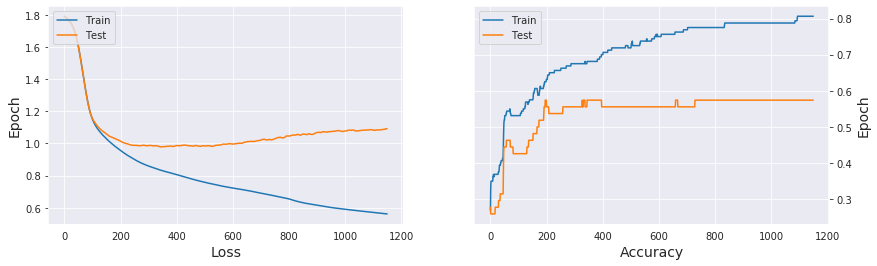

In [166]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epoch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history['acc'])
axes[1].plot(history.history['val_acc'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In [169]:
print("Training set: ", history.history.get('acc')[-1])#this gives the accuracy of all but i want the last accuracy
print("Test set: ", history.history.get('val_acc')[-1])#Same in this also i want the last accuracy only

Training set:  0.8062500059604645
Test set:  0.5740740895271301


In [170]:
models = [('Logistic Regression', accuracy_lr_train, accuracy_lr_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
          ('SVM (Linear)', accuracy_svm_linear_train, accuracy_svm_linear_test),
          ('SVM (Kernel)', accuracy_svm_kernel_train, accuracy_svm_kernel_test),
          ('Naive Bayes', accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test),
          ('ANN', history.history.get('acc')[-1], history.history.get('val_acc')[-1]),
         ]

In [171]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,0.73750,0.592593
1,KNN,1.00000,0.666667
2,SVM (Linear),0.78125,0.629630
3,SVM (Kernel),0.96250,0.703704
4,Naive Bayes,0.58125,0.462963
5,Decision Tree Classification,0.97500,0.611111
6,Random Forest Classification,1.00000,0.722222
7,ANN,0.80625,0.574074


In [ ]:
#Conclusion is the Random Forest and Kernel Svm produces the best result

In [199]:
##############End of this Classification technique#########################
#improvement still needed using dimensionality reduction technique#########3
#which can better do the classification 
#Also feature engineerng can also be done further
#that is the combination some attribute will be more better